<a href="https://colab.research.google.com/github/sphy1597/3-2-ML/blob/main/wine_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글 드라이브 연동 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
red_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/winequality-red.csv', sep=';')
white_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/winequality-white.csv', sep=';')

In [19]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


데이터 전처리

In [47]:
# 레드 = 1, 화이트는 = 0 
red_wine['class']='1'
white_wine['class']='0'
wine_data = pd.concat([red_wine, white_wine], axis=0,ignore_index=True)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [48]:
# 결측값 확인
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [49]:
# 데이터 타입 변경
wine_data = wine_data.astype('float32')
print(wine_data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                    object
dtype: object
fixed acidity           float32
volatile acidity        float32
citric acid             float32
residual sugar          float32
chlorides               float32
free sulfur dioxide     float32
total sulfur dioxide    float32
density                 float32
pH                      float32
sulphates               float32
alcohol                 float32
quality                 float32
class                   float32
dtype: object


상관관계

In [50]:
# 상관관계 작은 순서대로 나열
wine_data.corr()['class'].sort_values(ascending=True)

total sulfur dioxide   -0.700357
free sulfur dioxide    -0.471644
residual sugar         -0.348821
citric acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile acidity        0.653036
class                   1.000000
Name: class, dtype: float64

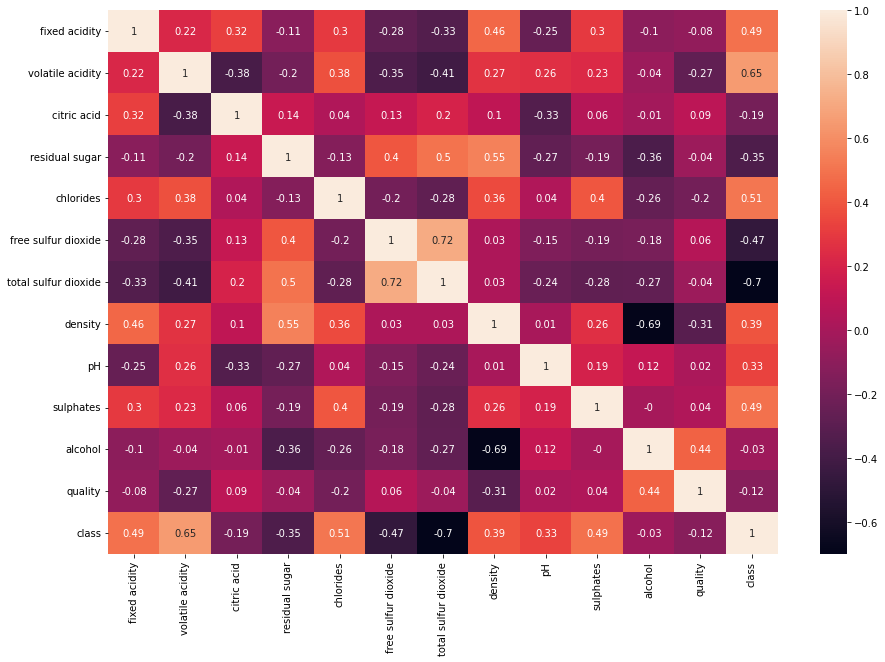

In [51]:
# 상관행렬 
plt.figure(figsize=(15,10))
correlation_matrix = wine_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


데이터 분리

In [52]:
# class로 분류하기 때문에 class는 target 나머지는 input
input = wine_data.drop('class', axis=1)
target = wine_data['class']

# 학습용, 테스트용 분리
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2) 

# 데이터 표준화
sc = StandardScaler()
x_train_ns = sc.fit_transform(x_train)
x_test_ns = sc.fit_transform(x_test)


svm

In [53]:
model = SVC(C=1, kernel='rbf')
model.fit(x_train, y_train)
svc_pred = model.predict(x_test)

# 평가지표
print('정확도 :', accuracy_score(y_test, svc_pred))
print('혼동행렬 \n', confusion_matrix(y_test, svc_pred))
print('Classification Report:\n', classification_report(y_test, svc_pred))


정확도 : 0.9438461538461539
혼동행렬 
 [[949  18]
 [ 55 278]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       967
         1.0       0.94      0.83      0.88       333

    accuracy                           0.94      1300
   macro avg       0.94      0.91      0.92      1300
weighted avg       0.94      0.94      0.94      1300



In [55]:
# red = 1 , white = 0
print(model.predict([[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5.0]])) # 레드
print(model.predict([[6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5, 6.0]])) # 화이트


[1.]
[0.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


랜덤포레스트


In [42]:
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(x_train, y_train)
rf_pred =rf_model.predict(x_test)

# 평가지표
print('정확도 :', accuracy_score(y_test, rf_pred))
print('혼동행렬 \n', confusion_matrix(y_test, rf_pred))
print('Classification Report:\n', classification_report(y_test, rf_pred))

정확도 : 0.9946153846153846
혼동행렬 
 [[313   6]
 [  1 980]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       319
         1.0       0.99      1.00      1.00       981

    accuracy                           0.99      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300

